In [1]:
#Import the required packages for preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.option_context('display.max_columns', None)

In [4]:
# Load the Dataset

data = pd.read_csv('credit_risk_dataset.csv')
display(data.shape)
display(data.info())

(32581, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


None

In [5]:
# Overview of numerical data
numerical_data_overview = data.describe()
numerical_columns = numerical_data_overview.columns

# Overview of categorical data
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_data_overview = data[categorical_columns].describe()

print("Numerical Data Overview:")
display(numerical_data_overview.T)

print("\n")

print("Categorical Data Overview:")
display(categorical_data_overview.T)

Numerical Data Overview:


,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00




Categorical Data Overview:


,count,unique,top,freq
person_home_ownership,32581,4,RENT,16446
loan_intent,32581,6,EDUCATION,6453
loan_grade,32581,7,A,10777
cb_person_default_on_file,32581,2,N,26836


In [6]:
# Initialize DataFrame to store missing data information
numerical_summary_df = pd.DataFrame()

# Iterate over the columns to count NaN values and calculate percentage
for column in data[numerical_columns].columns:
    nan_count = data[column].isna().sum()
    total_count = len(data)
    percent_missing = (nan_count / total_count) * 100

    # Create a DataFrame for the current column's missing data information
    column_missing_data = pd.DataFrame({
        'Column': [column],
        'Non-Data (NaN Count)': [nan_count],
        'Percentage Missing': [percent_missing]
    })

    # Concatenate with the main missing_data_df DataFrame
    numerical_summary_df = pd.concat([numerical_summary_df, column_missing_data], ignore_index=True)

# Assuming 10% missing data as threshold
numerical_summary_df['Status'] = np.where(numerical_summary_df['Percentage Missing'] <= 10, 'Pass', 'Fail')

numerical_summary_df.reset_index(drop=True, inplace=True)
numerical_summary_df

,Column,Non-Data (NaN Count),Percentage Missing,Status
0,person_age,0,0.000000,Pass
1,person_income,0,0.000000,Pass
2,person_emp_length,895,2.747000,Pass
3,loan_amnt,0,0.000000,Pass
4,loan_int_rate,3116,9.563856,Pass
5,loan_status,0,0.000000,Pass
6,loan_percent_income,0,0.000000,Pass
7,cb_person_cred_hist_length,0,0.000000,Pass


In [7]:
# Initialize DataFrame to store missing data information
categorical_summary_df = pd.DataFrame()

# Iterate over the columns to count NaN values and calculate percentage
for column in data[categorical_columns].columns:
    nan_count = data[column].isna().sum()
    total_count = len(data)
    percent_missing = (nan_count / total_count) * 100

    # Create a DataFrame for the current column's missing data information
    column_missing_data = pd.DataFrame({
        'Column': [column],
        'Non-Data (NaN Count)': [nan_count],
        'Percentage Missing': [percent_missing]
    })

    # Concatenate with the main missing_data_df DataFrame
    categorical_summary_df = pd.concat([categorical_summary_df, column_missing_data], ignore_index=True)

# Assuming 10% missing data as threshold
categorical_summary_df['Status'] = np.where(categorical_summary_df['Percentage Missing'] <= 10, 'Pass', 'Fail')

categorical_summary_df.reset_index(drop=True, inplace=True)
categorical_summary_df

,Column,Non-Data (NaN Count),Percentage Missing,Status
0,person_home_ownership,0,0.0,Pass
1,loan_intent,0,0.0,Pass
2,loan_grade,0,0.0,Pass
3,cb_person_default_on_file,0,0.0,Pass


In [8]:
missing_numerical = list(numerical_summary_df[numerical_summary_df['Status']=='Fail']['Column'].values)
missing_categorical = list(categorical_summary_df[categorical_summary_df['Status']=='Fail']['Column'].values)

print(missing_numerical)
print(missing_categorical)

[]
[]


In [12]:
data_cleaned = data.dropna()  # Create a copy here

In [13]:
duplicates = data_cleaned[data_cleaned.duplicated(keep=False)]

# Sorting the DataFrame by all columns to group duplicates together
duplicates_sorted = duplicates.sort_values(by=list(duplicates.columns))

duplicates_sorted.reset_index(drop=True, inplace=True)
duplicates_sorted

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
1,21,15600,RENT,0.0,MEDICAL,A,2800,7.40,1,0.18,N,4
2,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
3,21,18000,RENT,0.0,DEBTCONSOLIDATION,A,3000,7.90,1,0.17,N,2
4,21,26000,RENT,5.0,DEBTCONSOLIDATION,A,6000,7.49,0,0.23,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
269,40,38000,RENT,4.0,DEBTCONSOLIDATION,D,7000,15.99,1,0.18,N,16
270,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
271,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
272,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12


In [14]:
# Duplication confirmed, keep first and remove duplicate
data_cleaned = data_cleaned.drop_duplicates(keep='first')

In [15]:
data_cleaned.to_csv('data_cleaned.csv')

In [16]:
# Import the required packages EDA & Modelling
# First data manipulation packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# bivariate analysis
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

# winsorize,encoding & scaling
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# feature engineering/selection
from sklearn.decomposition import PCA

# modeling
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# memory management
import gc

import warnings
warnings.filterwarnings('ignore')


In [17]:
data = pd.read_csv('data_cleaned.csv').drop(columns=['Unnamed: 0'])

In [18]:
# Overview of numerical data
numerical_data_overview = data.describe()
numerical_columns = numerical_data_overview.columns
categorical_columns = data.select_dtypes(include=['object']).columns

numerical_data_overview = data.describe()
categorical_data_overview = data[categorical_columns].describe()

display(data.dtypes)
display(data.shape)
display(numerical_data_overview.T)
display(categorical_data_overview.T)

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

(28501, 12)

,count,mean,std,min,25%,50%,75%,max
person_age,28501.0,27.738676,6.316166,20.00,23.00,26.00,30.00,144.00
person_income,28501.0,66654.411319,62376.028215,4000.00,39500.00,56000.00,80000.00,6000000.00
person_emp_length,28501.0,4.790148,4.157462,0.00,2.00,4.00,7.00,123.00
loan_amnt,28501.0,9658.533034,6329.604672,500.00,5000.00,8000.00,12500.00,35000.00
loan_int_rate,28501.0,11.045385,3.230748,5.42,7.90,10.99,13.48,23.22
loan_status,28501.0,0.217115,0.412289,0.00,0.00,0.00,0.00,1.00
loan_percent_income,28501.0,0.169517,0.106410,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,28501.0,5.800498,4.042153,2.00,3.00,4.00,8.00,30.00


,count,unique,top,freq
person_home_ownership,28501,4,RENT,14498
loan_intent,28501,6,EDUCATION,5670
loan_grade,28501,7,A,9345
cb_person_default_on_file,28501,2,N,23411


## Univariate Analysis

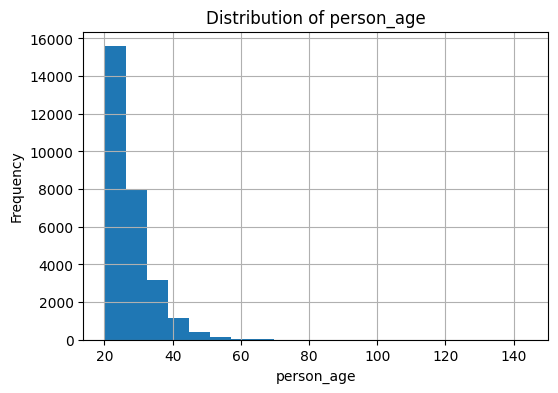

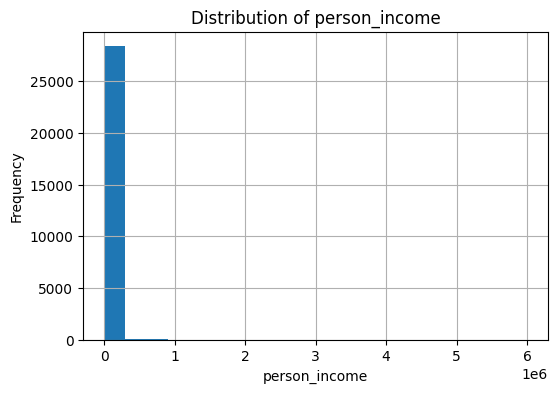

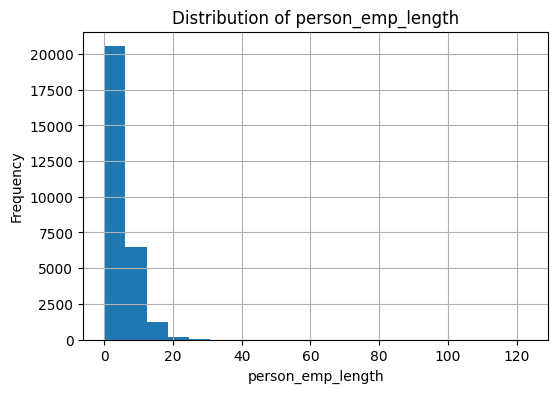

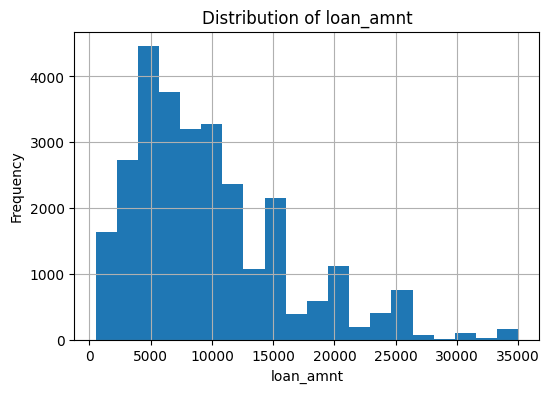

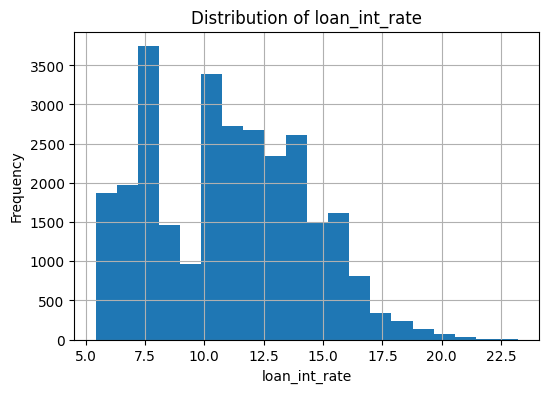

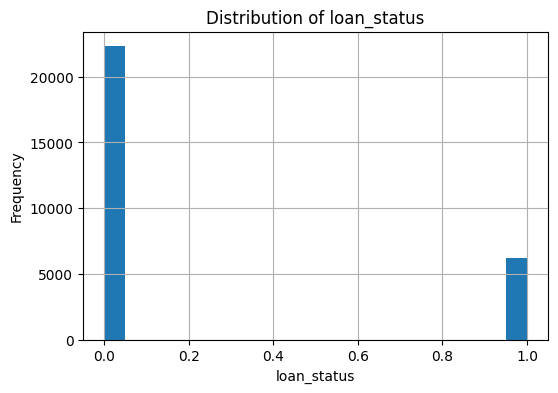

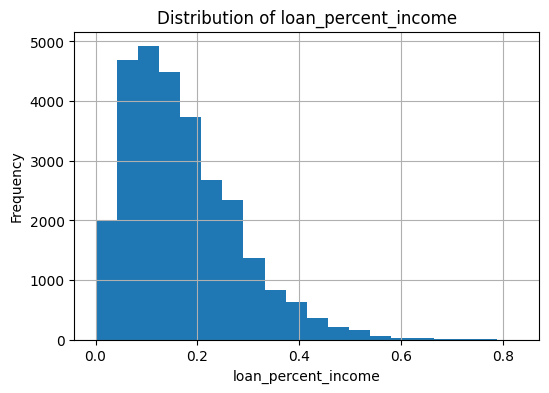

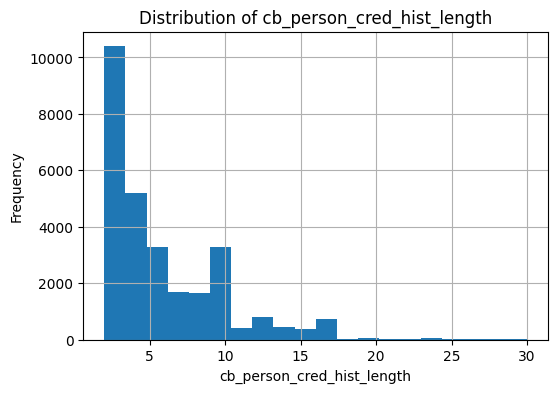

In [19]:
# Histograms
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    data[col].hist(bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

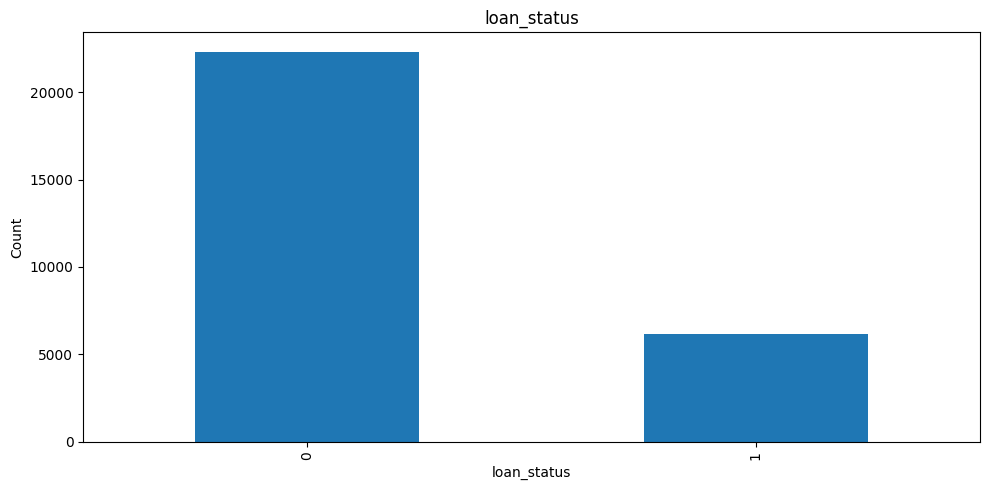

In [21]:
# Target variables
# Significant imbalance issue
plt.figure(figsize=(10, 5))

#plt.subplot(4, 2, i + 1)
data['loan_status'].value_counts().plot(kind='bar')
plt.title('loan_status')
plt.xlabel('loan_status')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

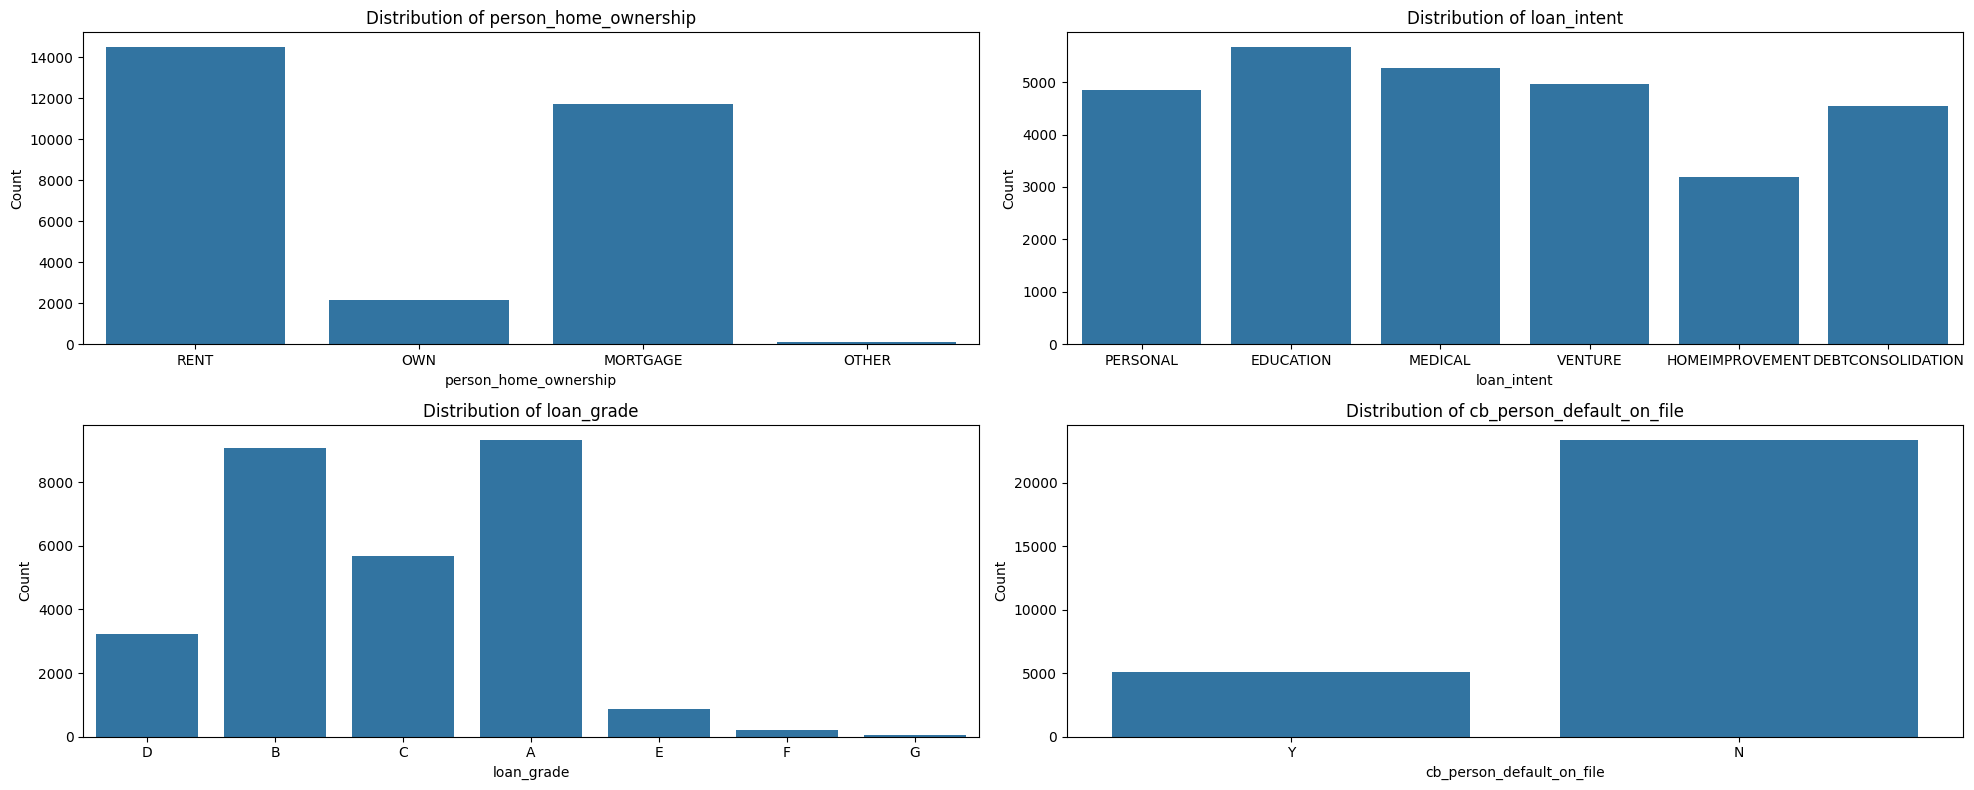

In [39]:
# Number of columns and rows for the subplot grid
n_cols = 2
n_rows = len(categorical_columns) // n_cols + (len(categorical_columns) % n_cols > 0)

plt.figure(figsize=(20, 4 * n_rows))

# Plotting each categorical variable
for i, var in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(x=var, data=data)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [38]:
categorical_columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

## Bivariate Analysis

In [40]:
# Overview of numerical data
numerical_data_overview = data.describe()
numerical_cols = numerical_data_overview.columns
categorical_cols = data.select_dtypes(include=['object']).columns

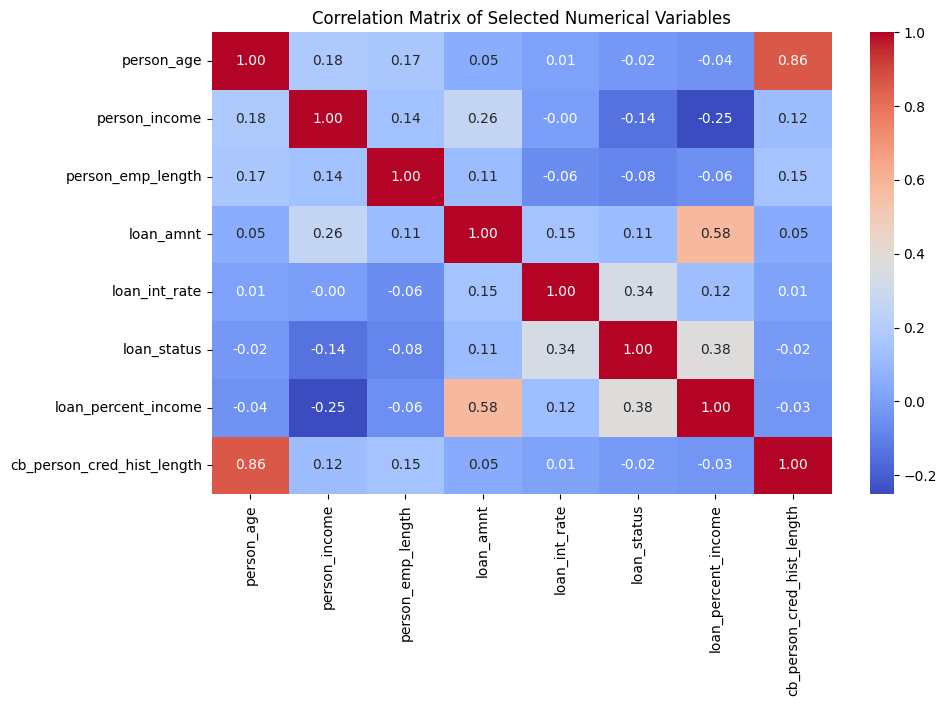

In [41]:
# Calculating the correlation matrix for the selected numerical variables
correlation_matrix = data[numerical_cols].corr()

# Creating a heatmap for the subset correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Selected Numerical Variables")
plt.show()

In [44]:
#Point-Biserial Correlation Coefficient:
# best with binary target and continuous features

def point_biserial_correlation(data, numerical_columns, target_column):
    """
    Calculate Point-Biserial Correlation Coefficient for each numerical column against a binary categorical target column.

    :param data: Pandas DataFrame containing the dataset.
    :param numerical_columns: List of names of the numerical columns.
    :param target_column: Name of the target column.
    :return: DataFrame with Point-Biserial Correlation results - Coefficient and p-value for each numerical feature.
    """
    # Convert the binary categorical target to numeric (0 and 1)
    target_numeric = data[target_column].copy()

    results = []

    for column in numerical_columns:
        coef, p_val = pointbiserialr(data[column], target_numeric)
        results.append([column, coef, p_val])

    results_df = pd.DataFrame(results, columns=['Feature', 'Point-Biserial Coefficient', 'P-Value'])
    return results_df

# Calculate Point-Biserial Correlation Coefficient for each numerical feature against the target
point_biserial_results_df = point_biserial_correlation(data, numerical_cols, 'loan_status')
round(point_biserial_results_df.sort_values(by='Point-Biserial Coefficient', ascending=False),3)


,Feature,Point-Biserial Coefficient,P-Value
5,loan_status,1.000,0.000
6,loan_percent_income,0.380,0.000
4,loan_int_rate,0.340,0.000
3,loan_amnt,0.114,0.000
7,cb_person_cred_hist_length,-0.017,0.005
0,person_age,-0.024,0.000
2,person_emp_length,-0.083,0.000
1,person_income,-0.140,0.000


In [45]:
numerical_relevant_features = [feature for feature in numerical_cols if feature not in ['cb_person_cred_hist_length','person_age','person_emp_length','person_income']]

In [47]:
def chi_square_test(data, categorical_columns, target_column):
    """
    Perform Chi-Square test for each categorical column against the target column.

    :param data: Pandas DataFrame containing the dataset.
    :param categorical_columns: List of names of the categorical columns.
    :param target_column: Name of the target column.
    :return: DataFrame with Chi-Square results - Chi-Square value, p-value, and degrees of freedom.
    """
    results = []

    for column in categorical_columns:
        contingency_table = pd.crosstab(data[column], data[target_column])
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        results.append([column, chi2, p, dof])

    results_df = pd.DataFrame(results, columns=['Feature', 'Chi2', 'P-Value', 'Degrees of Freedom'])
    return results_df

# Perform the Chi-Square Test
chi_square_results_df = chi_square_test(data, categorical_cols, 'loan_status')
round(chi_square_results_df,3)  # Displaying the top results


,Feature,Chi2,P-Value,Degrees of Freedom
0,person_home_ownership,1639.659,0.0,3
1,loan_intent,464.646,0.0,5
2,loan_grade,5109.525,0.0,6
3,cb_person_default_on_file,947.040,0.0,1


In [48]:
# cramer v test
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    """ Calculate Cramér's V statistic for two categorical variables.

    :param x: First categorical variable
    :param y: Second categorical variable
    :return: Cramér's V statistic
    """
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

# Calculate Cramér's V for each categorical variable against the target
cramers_v_results = {}
target = data['loan_status']

for col in categorical_cols:
    cramers_v_results[col] = cramers_v(data[col], target)

# Store the results in a DataFrame and sort by the highest association
cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=['Cramers_V'])
cramers_v_df = cramers_v_df.sort_values(by='Cramers_V', ascending=False)

cramers_v_df = round(cramers_v_df,2)  # Displaying the top results
cramers_v_df

,Cramers_V
loan_grade,0.42
person_home_ownership,0.24
cb_person_default_on_file,0.18
loan_intent,0.13


In [49]:
# Define the threshold for relevance
threshold = 0.1

# Filter the features based on the threshold
categorical_relevant_features = cramers_v_df[cramers_v_df['Cramers_V'] >= threshold].index.tolist()
categorical_relevant_features

['loan_grade',
 'person_home_ownership',
 'cb_person_default_on_file',
 'loan_intent']

In [50]:
#numerical_relevant_features
#categorical_relevant_features
features_data = data[numerical_relevant_features+categorical_relevant_features]
features_data.columns

Index(['loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'loan_grade', 'person_home_ownership', 'cb_person_default_on_file',
       'loan_intent'],
      dtype='object')

## Futher preprocessing

In [51]:
# Checking for missing values
missing_values = features_data.isnull().sum().sort_values(ascending=False)

# Detecting outliers using IQR method for numerical columns
def detect_outliers(df, cols):
    outlier_indices = []

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_list_col = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = list(set(outlier_indices))
    return outlier_indices

numerical_cols = features_data.select_dtypes(include=['float64', 'int64']).columns
outlier_indices = detect_outliers(features_data, numerical_cols)

# Overview of outliers
outliers_overview = features_data.iloc[outlier_indices].describe()

missing_values, outliers_overview.shape

(loan_amnt                    0
 loan_int_rate                0
 loan_status                  0
 loan_percent_income          0
 loan_grade                   0
 person_home_ownership        0
 cb_person_default_on_file    0
 loan_intent                  0
 dtype: int64,
 (8, 4))

In [52]:
# Winsorizing each numerical column at 5th and 95th percentiles
for col in numerical_cols:
    features_data[col] = winsorize(features_data[col], limits=[0.05, 0.05])

# Checking the effect of winsorization on the dataset
winsorized_overview = features_data[numerical_cols].describe()
winsorized_overview


,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,28501.000000,28501.000000,28501.000000,28501.000000
mean,9551.341181,10.995563,0.217115,0.166763
std,5918.192786,3.071657,0.412289,0.096433
min,2000.000000,6.030000,0.000000,0.040000
25%,5000.000000,7.900000,0.000000,0.090000
50%,8000.000000,10.990000,0.000000,0.150000
75%,12500.000000,13.480000,0.000000,0.230000
max,24000.000000,16.320000,1.000000,0.380000


## Encode

In [56]:
data_encoded = features_data.copy()
data_encoded

,loan_amnt,loan_int_rate,loan_status,loan_percent_income,loan_grade,person_home_ownership,cb_person_default_on_file,loan_intent
0,24000,16.02,1,0.38,D,RENT,Y,PERSONAL
1,2000,11.14,0,0.10,B,OWN,N,EDUCATION
2,5500,12.87,1,0.38,C,MORTGAGE,N,MEDICAL
3,24000,15.23,1,0.38,C,RENT,N,MEDICAL
4,24000,14.27,1,0.38,C,RENT,Y,MEDICAL
...,...,...,...,...,...,...,...,...
28496,5800,13.16,0,0.11,C,MORTGAGE,N,PERSONAL
28497,17625,7.49,0,0.15,A,MORTGAGE,N,PERSONAL
28498,24000,10.99,1,0.38,B,RENT,N,HOMEIMPROVEMENT
28499,15000,11.48,0,0.10,B,MORTGAGE,N,PERSONAL


In [57]:
# Extracting the list of numerical and categorical features from data_encoded
final_numerical_features = [feature for feature in data_encoded.columns if data_encoded[feature].dtype in ['int64', 'float64']]
final_categorical_features = [feature for feature in data_encoded.columns if feature not in final_numerical_features]

# Checking the number of unique values for the categorical features
binary_categorical_features = []
non_binary_categorical_features = []

for feature in final_categorical_features:
    unique_values = data_encoded[feature].nunique()
    if unique_values == 2:
        binary_categorical_features.append(feature)
    else:
        non_binary_categorical_features.append(feature)

# Output the binary and non-binary categorical features
binary_categorical_features, non_binary_categorical_features

(['cb_person_default_on_file'],
 ['loan_grade', 'person_home_ownership', 'loan_intent'])

In [58]:
# Encoding binary categorical features with 0 and 1
for feature in binary_categorical_features:
    unique_vals = data_encoded[feature].unique()
    mapping = {unique_vals[0]: 0, unique_vals[1]: 1}
    data_encoded[feature] = data_encoded[feature].map(mapping)

# Applying OneHotEncoder to non-binary categorical features
encoder = OneHotEncoder(sparse=False)  # sparse=False to return a numpy array
encoded_features = encoder.fit_transform(data_encoded[non_binary_categorical_features])

# Create a DataFrame with the encoded features
encoded_features_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(non_binary_categorical_features))

# Drop the original non-binary categorical features from data_encoded
data_encoded.drop(non_binary_categorical_features, axis=1, inplace=True)

# Concatenate the original data with the new encoded features
data_encoded = pd.concat([data_encoded, encoded_features_df], axis=1)

# Display the first few rows of the dataset with encoded features
data_encoded.head()


,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,...,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,24000,16.02,1,0.38,0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2000,11.14,0,0.10,1,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5500,12.87,1,0.38,1,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,24000,15.23,1,0.38,1,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,24000,14.27,1,0.38,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [60]:
# Separating features and target variable
X = data_encoded.drop('loan_status', axis=1)  # Features
y = data_encoded['loan_status']               # Target

# Initializing the StandardScaler Z-Score Scalling
scaler = StandardScaler()

# Applying Standard Scaling to the features
X_scaled = scaler.fit_transform(X)

# Creating a DataFrame from the scaled features
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
scaled_data['loan_status'] = y  # Adding the target variable back correctly

scaled_data.head()

,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,...,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_status
0,2.441440,1.635770,2.211286,-2.144624,-0.698453,-0.684539,-0.499002,2.790783,-0.177339,-0.085949,...,-0.057216,-0.287362,0.982780,-0.435686,-0.498344,-0.354822,-0.476234,2.205813,-0.459521,1
1,-1.275976,0.047023,-0.692337,0.466282,-0.698453,1.460837,-0.499002,-0.358322,-0.177339,-0.085949,...,-0.057216,3.479933,-1.017521,-0.435686,2.006647,-0.354822,-0.476234,-0.453348,-0.459521,0
2,-0.684569,0.610247,2.211286,0.466282,-0.698453,-0.684539,2.004000,-0.358322,-0.177339,-0.085949,...,-0.057216,-0.287362,-1.017521,-0.435686,-0.498344,-0.354822,2.099806,-0.453348,-0.459521,1
3,2.441440,1.378576,2.211286,0.466282,-0.698453,-0.684539,2.004000,-0.358322,-0.177339,-0.085949,...,-0.057216,-0.287362,0.982780,-0.435686,-0.498344,-0.354822,2.099806,-0.453348,-0.459521,1
4,2.441440,1.066035,2.211286,-2.144624,-0.698453,-0.684539,2.004000,-0.358322,-0.177339,-0.085949,...,-0.057216,-0.287362,0.982780,-0.435686,-0.498344,-0.354822,2.099806,-0.453348,-0.459521,1


## Feature Selection/Engineering

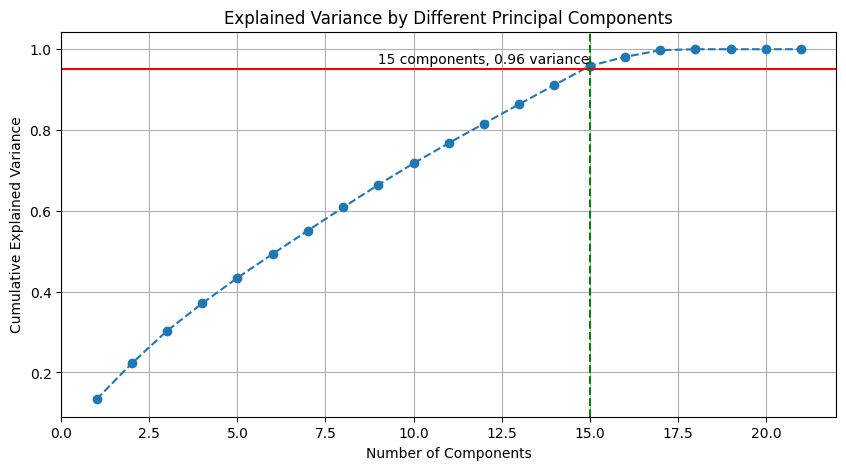

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,loan_status
0,3.743576,0.530309,1.475531,2.380578,-0.191628,-1.053351,-1.985764,1.991741,0.349187,-0.942479,-0.711514,-0.616288,0.301169,0.202235,-0.839623,1
1,-0.534441,-0.545171,0.204805,-2.017693,2.392181,2.096507,0.026605,0.492471,0.758326,-0.335648,-1.407276,1.424791,-1.597950,-0.757398,1.120319,0
2,0.802862,1.195130,0.022932,0.305172,-0.295067,-0.301685,2.534026,0.377316,-1.653161,-0.156387,-0.434693,-0.159125,-0.171872,0.236674,-0.630257,1
3,2.476644,-0.484029,1.492555,2.003048,-0.255381,-0.183965,2.307891,0.319293,-1.871343,0.312099,-0.486768,-0.278704,0.001493,0.283941,-0.833184,1
4,3.338320,-0.030169,0.728244,2.331452,-0.209333,-0.211247,2.321027,0.324476,-1.970801,0.295589,-0.549093,-0.331738,0.002564,0.325913,-0.860230,1


In [67]:
# Perform PCA on the training features # Linear
pca = PCA().fit(X_scaled)

# Calculate the explained variance for each component
explained_variance = pca.explained_variance_ratio_

# Setting the threshold for cumulative explained variance
variance_threshold = 0.95

# Determining the number of components to reach the variance threshold
cumulative_variance = explained_variance.cumsum()
num_components = next(x[0] for x in enumerate(cumulative_variance) if x[1] > variance_threshold) + 1

# Updating the plot to include the threshold
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=variance_threshold, color='r', linestyle='-')
plt.axvline(x=num_components, color='g', linestyle='--')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Highlight the point where the threshold is crossed
plt.scatter(num_components, cumulative_variance[num_components - 1], color='blue')
plt.text(num_components, cumulative_variance[num_components - 1], f'  {num_components} components, {cumulative_variance[num_components - 1]:.2f} variance', verticalalignment='bottom', horizontalalignment='right')

plt.show()

num_components, cumulative_variance[num_components - 1]

# Applying PCA with acceptable components
pca_components = PCA(n_components=num_components)
X_pca_components = pca_components.fit_transform(X_scaled)

# Creating a DataFrame of the PCA results
pca_columns = [f'PC{i+1}' for i in range(num_components)]
pca_df = pd.DataFrame(X_pca_components, columns=pca_columns)
pca_df['loan_status'] = y  # Adding the target variable back

pca_df.head()


In [68]:
# Extracting PCA Loadings
loadings = pca_components.components_

# Creating a DataFrame for Loadings
features = list(X.columns)  # Replace with your actual feature names
loadings_df = pd.DataFrame(loadings.T, columns=pca_columns, index=features)

## Split data and handle imbalanced data

In [69]:
for _ in range(5):  # Looping a few times
    gc.collect()  # Clear unused memory

# Split data
X = pca_df.drop('loan_status', axis=1)
y = pca_df['loan_status']

# set train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# smote to handle imbalanced data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [70]:
# Function for evaluation
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Function for Logistic Regression model
def logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return evaluate_model(y_test, y_pred)

# Function for Random Forest model
def random_forest(X_train, y_train, X_test, y_test):
    model = RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return evaluate_model(y_test, y_pred)

# Function for RNN model
def rnn_model(X_train, y_train, X_test, y_test):
    # Convert DataFrame to NumPy array and then reshape for RNN
    X_train_array = X_train.to_numpy()
    X_test_array = X_test.to_numpy()
    X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], X_train_array.shape[1], 1))
    X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], X_test_array.shape[1], 1))

    # Simplified RNN model
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(30, input_shape=(X_train_reshaped.shape[1], 1), activation='relu'),
        tf.keras.layers.Dense(5, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile and train the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_reshaped, y_train, epochs=5, batch_size=64, verbose=1)

    # Make predictions
    y_pred = model.predict(X_test_reshaped).flatten()
    y_pred = [1 if y > 0.5 else 0 for y in y_pred]  # Convert probabilities to class labels

    return evaluate_model(y_test, y_pred)

In [71]:
models = [logistic_regression, random_forest,rnn_model]

results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Loop through each model
for model_func in models:
    accuracy, precision, recall, f1 = model_func(X_train_smote, y_train_smote, X_test, y_test)
    new_row = pd.DataFrame({
        "Model": [model_func.__name__],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1 Score": [f1]
    })
    results_df = pd.concat([results_df, new_row], ignore_index=True)

    # Print the message after each model is processed
    print(f'Done for {model_func.__name__}')

# Display the results
display(results_df)

Done for logistic_regression
Done for random_forest


Epoch 1/5


559/559 [==============================] - 2s 2ms/step - loss: 0.5405 - accuracy: 0.7261
Epoch 2/5
559/559 [==============================] - 1s 2ms/step - loss: 0.4521 - accuracy: 0.7901
Epoch 3/5
559/559 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8028
Epoch 4/5
559/559 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.8083
Epoch 5/5
179/179 [==============================] - 0s 1ms/step
Done for rnn_model


,Model,Accuracy,Precision,Recall,F1 Score
0,logistic_regression,0.779337,0.708414,0.767409,0.723441
1,random_forest,0.825995,0.750903,0.788262,0.765647
2,rnn_model,0.843536,0.772164,0.799805,0.784113


## Parameter tuning

In [73]:
# set back the train & test
X = pca_df.drop('loan_status', axis=1)
y = pca_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

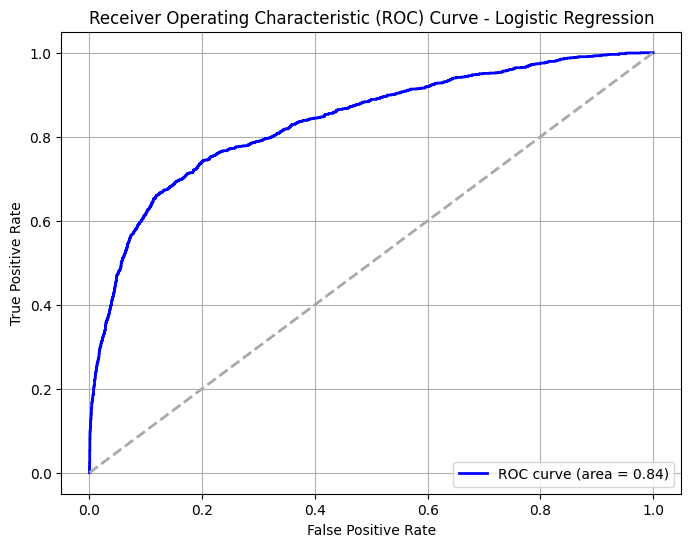

Accuracy: 0.78
Precision: 0.71
Recall: 0.77
F1 Score: 0.72
ROC AUC: 0.84


In [74]:
# Logistic Regression with Hyperparameter Tuning
model = LogisticRegression()
param_grid = {
    'max_iter': [50, 100, 200],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc_roc = roc_auc_score(y_test, y_probs)

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {auc_roc:.2f}")

for _ in range(5):  # Looping a few times
    gc.collect()  # Clear unused memory


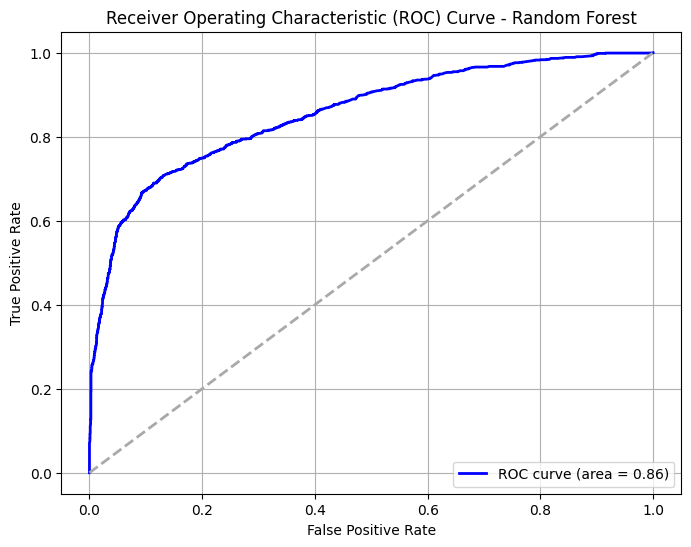

Accuracy: 0.81
Precision: 0.73
Recall: 0.78
F1 Score: 0.75
ROC AUC: 0.86


In [76]:
# Random Forest with  Hyperparameter Tuning
model = RandomForestClassifier(random_state=42)

# Define a very basic hyperparameters grid to search
param_grid = {
    'n_estimators': [30],  # Number of trees (keeping it minimal for testing)
    'max_depth': [5],      # Maximum depth of the tree (minimal depth)
    'min_samples_split': [10],
    'min_samples_leaf': [2]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)  # Reduced cv to 3 for faster execution
grid_search.fit(X_train_smote, y_train_smote)

# Best Model Evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_probs = best_model.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc_roc = roc_auc_score(y_test, y_probs)

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {auc_roc:.2f}")

for _ in range(5):  # Looping a few times
    gc.collect()  # Clear unused memory

Epoch 1/10
559/559 [==============================] - 8s 9ms/step - loss: 0.6068 - accuracy: 0.6775
Epoch 2/10
559/559 [==============================] - 5s 9ms/step - loss: 0.5797 - accuracy: 0.7016
Epoch 3/10
559/559 [==============================] - 5s 9ms/step - loss: 0.5386 - accuracy: 0.7420
Epoch 4/10
559/559 [==============================] - 5s 9ms/step - loss: 0.5038 - accuracy: 0.7672
Epoch 5/10
559/559 [==============================] - 5s 9ms/step - loss: 0.4833 - accuracy: 0.7799
Epoch 6/10
559/559 [==============================] - 5s 9ms/step - loss: 0.4686 - accuracy: 0.7849
Epoch 7/10
559/559 [==============================] - 5s 9ms/step - loss: 0.4586 - accuracy: 0.7896
Epoch 8/10
559/559 [==============================] - 5s 9ms/step - loss: 0.4493 - accuracy: 0.7916
Epoch 9/10
559/559 [==============================] - 5s 9ms/step - loss: 0.4415 - accuracy: 0.7954
Epoch 10/10
179/179 [==============================] - 1s 3ms/step


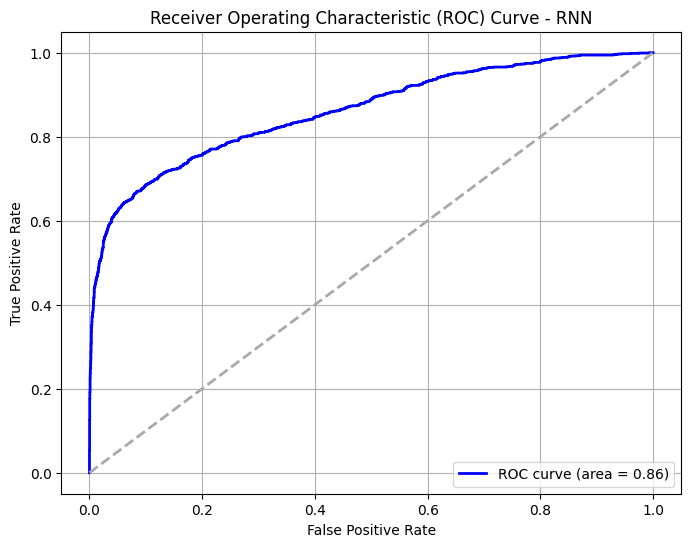

Accuracy: 0.86
Precision: 0.81
Recall: 0.79
F1 Score: 0.80
ROC AUC: 0.86


In [77]:
# RNN model tuning
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_smote.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Reshape data for LSTM layer
X_train_reshaped = X_train_smote.to_numpy().reshape((X_train_smote.shape[0], X_train_smote.shape[1], 1))
X_test_reshaped = X_test.to_numpy().reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
model.fit(X_train_reshaped, y_train_smote, epochs=10, batch_size=64, verbose=1)  # Reduced epochs for faster execution

# Make predictions
y_probs = model.predict(X_test_reshaped).flatten()  # Predicted probabilities
y_pred = [1 if y > 0.5 else 0 for y in y_probs]      # Convert probabilities to class labels

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc_roc = roc_auc_score(y_test, y_probs)

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], color='darkgrey', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - RNN')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Print Evaluation Metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {auc_roc:.2f}")

for _ in range(5):  # Looping a few times
    gc.collect()  # Clear unused memory